## Machine Learning Foundation & Techniques: Assignment 4

### Regularized Linear Regression
---

Consider regularized linear regression (also called ridge regression) for classification.

$$
w_{reg} = arg \min_{w} \frac{\lambda}{N} \|w \|^{2} + \frac{1}{N} \|Xw-y\|^{2},
$$

Run the algorithm on the following data set as $D$: http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw4/hw4_train.dat

and the following set for evaulating $E_{out}$: http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw4/hw4_test.dat

Because the data sets are for ***classification***, please consider only the ***0/1 error*** for all the problems below.


##### Read & generate dataset

In [15]:
import pandas as pd
import numpy as np

def read_data(file):
    data = pd.read_csv(file, sep = ' ', header = None)
    data = data.drop(0, axis = 1)  # drop the first empty column
    
    return data


def generate_data(data):
    """Return data point X and lable Y."""
    
    X = data.loc[:, 0:1]
    Y = data.loc[:, 2:2].values
    
    N = X.shape[0]
    X0 = np.ones((N, 1))      # add coefficient term X0
    X = np.hstack((X0, X))
    
    return X, Y

##### Build model

In [16]:
def ridge_regression(X, Y, _lambda):
    """Construct a regularized linear regression model and return the optimal weight vector W."""
    
    inverse = np.linalg.pinv(X.T.dot(X) + _lambda * np.identity(2))
    W = inverse.dot(X.T.dot(Y))    

    return W

##### Compute classification error for ridge regression

In [17]:
def ridge_regression_err(X, Y, W):
    """Calculate classification error (0/1 error)."""
    
    Y_pred = np.sign(X.dot(W))
    zero_one_err = np.sum(Y_pred != Y)
    
    return zero_one_err

##### Select lambda by minimum error

In [18]:
def select_lambda(E_in = True, E_out = False):
    """ Return lambda, minimum training and testing error, and a list of error for plotting.
        If not specified, select lambda by minimum E_in.
    """
    
    lambda_list = [(10 ** i) for i in range(2,-11,-1)]

    err_in_list = []
    err_out_list = []

    for _lambda in lambda_list:
        W = ridge_regression(X_train, Y_train, _lambda)

        err_in = ridge_regression_err(X_train, Y_train, W)
        err_out = ridge_regression_err(X_test, Y_test, W)

        err_in_list.append(err_in)
        err_out_list.append(err_out)
    
    if E_out:
        min_err = np.min(err_out_list)
        _lambda = lambda_list[np.argmin(err_out_list)]
        return _lambda, min_err, err_out_list
    else:
        min_err = np.min(err_out_list)
        _lambda = lambda_list[np.argmin(err_in_list)]
        err_out = err_out_list[np.argmin(err_in_list)]
        return _lambda, min_err, err_out, err_in_list
    

#### 13. Let $\lambda = 11.26$, what is the corresponding $E_{in}$ and $E_{out}$ ?

##### Experiment

In [19]:
train_file = 'data/hw4_train.dat.txt'; test_file = 'data/hw4_test.dat.txt'
data_train = read_data(train_file); data_test = read_data(test_file)
X_train, Y_train = generate_data(data_train)
X_test, Y_test = generate_data(data_test)

In [20]:
_lambda = 11.26

W = ridge_regression(X_train, Y_train, _lambda)
err_in = ridge_regression_err(X_train, Y_train, W)
err_out = ridge_regression_err(X_test, Y_test, W)

print('Classification in-sample error: %.d' %err_in)
print('Classification out-of-sample error: %.d' %err_out)

Classification in-sample error: 13
Classification out-of-sample error: 59


#### 14. Plot the curve of $E_{in}$ with respect to $log_{10} \lambda = \{2,1,0,−1,...,−8,−9,−10\}$. What is the $\lambda$ with the minimum $E_{in}$ ? What is $E_{out}(g_{\lambda})$ on such $\lambda$ ? Break the tie by selecting the largest $\lambda$.

#### 15. Plot the curve of $E_{out}$ with respect to $log_{10} \lambda = \{2,1,0,−1,...,−8,−9,−10\}$. What is the $\lambda$ with the minimum $E_{out}$ ? Break the tie by selecting the largest $\lambda$.

##### Experiment

In [21]:
lambda_g, min_err_in, err_out_g, err_in_list = select_lambda()
lambda_out, min_err_out, err_out_list = select_lambda(E_out = True)

print('# Select lambda by E_in')
print('lambda: %f; training error: %d; out-of-sample error %d' %(lambda_g, min_err_in, err_out_g))
print('\n')
print('# Select lambda by E_out')
print('lambda: %f; testing error: %d' %(lambda_out, min_err_out))

# Select lambda by E_in
lambda: 0.010000; training error: 16; out-of-sample error 16


# Select lambda by E_out
lambda: 0.100000; testing error: 16


##### Plot error with respect to lambda

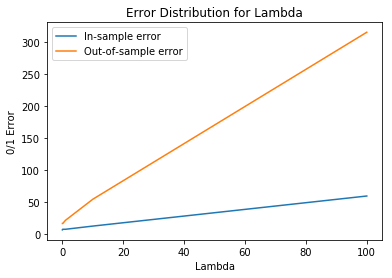

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

lambda_list = [(10 ** i) for i in range(2,-11,-1)]

plt.plot(lambda_list, err_in_list, label = 'In-sample error')
plt.plot(lambda_list, err_out_list, label = 'Out-of-sample error')
plt.legend()
plt.title('Error Distribution for Lambda')
plt.xlabel('Lambda')
plt.ylabel('0/1 Error')

### Validation
---

Now split the given training examples in $D$ to the first 120 examples for $D_{train}$ and 80 for $D_{val}$. 

*Ideally, you should randomly do the 120/80 split. Because the given examples are already randomly permuted, however, we would use a fixed split for the purpose of this problem.*

Run the algorithm on $D_{train}$ to get $g_{\lambda}^{-}$, and validate $g{\lambda}^{-}$ with $D_{val}$.


##### Split dataset into training & validation

In [23]:
def split_data(data):
    """Return training and validation dataset by the 120/80 split."""
    
    D_train = data.loc[:119, :]
    D_val = data.loc[120:, :]
    
    return D_train, D_val

##### Select lambda by minimum error

In [24]:
def select_lambda(E_train = True, E_val = False):
    """ Return lambda, minimum training and testing error, and a list of error for plotting.
        If not specified, select lambda by minimum E_train.
    """
    
    lambda_list = [(10 ** i) for i in range(2,-11,-1)]

    err_train_list = []
    err_val_list = []
    err_out_list = []

    for _lambda in lambda_list:
        W = ridge_regression(X_train, Y_train, _lambda)

        err_train = ridge_regression_err(X_train, Y_train, W)
        err_val = ridge_regression_err(X_val, Y_val, W)
        err_out = ridge_regression_err(X_test, Y_test, W)

        err_train_list.append(err_train)
        err_val_list.append(err_val)
        err_out_list.append(err_out)
    
    if E_val:
        min_err = np.mean(err_val_list)
        _lambda = lambda_list[np.argmin(err_val_list)]
        err_out = err_out_list[np.argmin(err_val_list)]
        return _lambda, min_err, err_out, err_val_list
    else:
        min_err = np.mean(err_train_list)
        _lambda = lambda_list[np.argmin(err_train_list)]
        err_out = err_out_list[np.argmin(err_train_list)]
        return _lambda, min_err, err_out, err_train_list
    

#### 16. Plot $E_{train}(g_{\lambda}^{-})$ with respect to $log_{10} \lambda = \{2,1,0,−1,...,−8,−9,−10\}$. What is the $\lambda$ with the minimum $E_{train}(g_{\lambda}^{-})$ ? What is $E_{out}(g_{\lambda}^{-})$ on such $\lambda$ ? Break the tie by selecting the largest $\lambda$.

#### 17. Plot $E_{val}(g_{\lambda}^{-})$ with respect to $log_{10} \lambda = \{2,1,0,−1,...,−8,−9,−10\}$. What is the $\lambda$ with the minimum $E_{val}(g_{\lambda}^{-})$ ? What is $E_{out}(g_{\lambda}^{-})$ on such $\lambda$ ? Break the tie by selecting the largest $\lambda$.

##### Experiment

In [25]:
D_train, D_val = split_data(data_train)
X_train, Y_train = generate_data(D_train)
X_val, Y_val = generate_data(D_val)

In [26]:
lambda_train, min_err_train, err_out_train, err_train_list = select_lambda()
lambda_val, min_err_val, err_out_val, err_val_list = select_lambda(E_val = True)

print('# Select lambda by E_train')
print('lambda: %f; training error: %d; out-of-sample error %d' %(lambda_train, min_err_train, err_out_train))
print('\n')
print('# Select lambda by E_val')
print('lambda: %f; validation error: %d; out-of-sample error %d' %(lambda_val, min_err_val, err_out_val))

# Select lambda by E_train
lambda: 1.000000; training error: 8; out-of-sample error 30


# Select lambda by E_val
lambda: 0.100000; validation error: 6; out-of-sample error 22


##### Plot error with respect to lambda

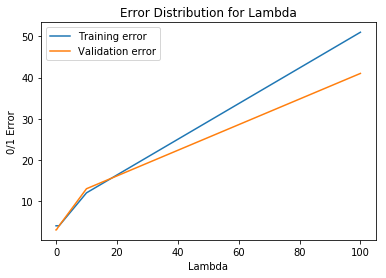

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

lambda_list = [(10 ** i) for i in range(2,-11,-1)]

plt.plot(lambda_list, err_train_list, label = 'Training error')
plt.plot(lambda_list, err_val_list, label = 'Validation error')
plt.legend()
plt.title('Error Distribution for Lambda')
plt.xlabel('Lambda')
plt.ylabel('0/1 Error')

#### 18. Run the algorithm with the optimal $\lambda$ of the previous problem on the whole $D$ to get $g_{\lambda}$ . What is $E_{in}(g_{\lambda})$ and $E_{out}(g_{\lambda})$ ?

In [28]:
X, Y = generate_data(data_train)
X_test, Y_test = generate_data(data_test)
W = ridge_regression(X, Y, lambda_val)
err_in_g = ridge_regression_err(X, Y, W)
err_out_g = ridge_regression_err(X_test, Y_test, W)

print('Lambda: %f' %lambda_val)
print('Training error: %d' %err_in_g)
print('Testing error: %d' %err_out_g)

Lambda: 0.100000
Training error: 7
Testing error: 16


### Cross-validation
---
Now split the given training examples in $D$ to five folds, the first 40 being fold 1, the next 40 being fold 2, and so on. Again, we take a fixed split because the given examples are already randomly permuted.

##### Split dataset into training & validation

In [29]:
def split_data(data, fold):
    
    k = 40
    D_val = data.loc[(fold-1)*k : fold*k-1, :]
    D_train = data[~data.isin(D_val)].dropna()
    
    return D_train, D_val

#### 19.  Plot $E_{cv}$ with respect to $log_{10} \lambda = \{2,1,0,−1,...,−8,−9,−10\}$. What is the $\lambda$ with the minimum $E_{cv}$, where $E_{cv}$ comes from the five folds defined above? Break the tie by selecting the largest $\lambda$.

##### Experiment

In [30]:
N = data_train.shape[0]
lambda_list = [(10 ** i) for i in range(2,-11,-1)]

err_cv_list = []
for _lambda in lambda_list:
    
    err_val_list = []
    for i in range(int(N/40)):
        fold = i
        D_train, D_val = split_data(data_train, fold)
        X_train, Y_train = generate_data(D_train)
        X_val, Y_val = generate_data(D_val)
        
        W = ridge_regression(X_train, Y_train, _lambda)
        err_val = ridge_regression_err(X_val, Y_val, W)
        err_val_list.append(err_val)
    
    err_cv = np.mean(err_val_list)
    err_cv_list.append(err_cv)
    
    
min_err_cv = np.min(err_cv_list)
lambda_cv = lambda_list[np.argmin(err_cv_list)]

print('Lambda: %f' %lambda_cv)
print('Minimum cross-validation error: %f' %min_err_cv)

Lambda: 1.000000
Minimum cross-validation error: 0.800000


##### Plot error with respect to lambda

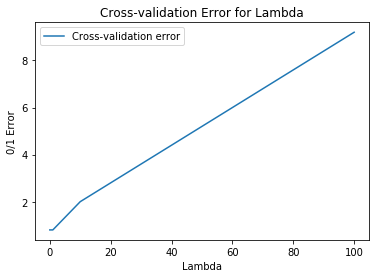

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

lambda_list = [(10 ** i) for i in range(2,-11,-1)]

plt.plot(lambda_list, err_cv_list, label = 'Cross-validation error')
plt.legend()
plt.title('Cross-validation Error for Lambda')
plt.xlabel('Lambda')
plt.ylabel('0/1 Error')

#### 20. Run the algorithm with the optimal $\lambda$ of the previous problem on the whole $D$ to get $g_{\lambda}$. What is $E_{in}(g_{\lambda})$ and $E_{out}(g_{\lambda})$ ?

In [32]:
X, Y = generate_data(data_train)
X_test, Y_test = generate_data(data_test)
W = ridge_regression(X, Y, lambda_cv)
err_in_g = ridge_regression_err(X, Y, W)
err_out_g = ridge_regression_err(X_test, Y_test, W)

print('Lambda: %f' %lambda_cv)
print('Training error: %d' %err_in_g)
print('Testing error: %d' %err_out_g)

Lambda: 1.000000
Training error: 7
Testing error: 21
